# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

def get_city_info(coordination_source):
    city_location = {}
    for line in coordination_source.split('\n'):
        if line.startswith('//'):
            continue
        if line.strip() == '':
            continue
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+\.\d+)", line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

In [3]:
city_info = get_city_info(coordination_source)

In [4]:
city_info

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [5]:
def get_city_distance(city1, city2):

    return geo_distance(city_info[city1],city_info[city2])

In [6]:
import math
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [7]:
get_city_distance('上海','杭州')

153.5185697155768

In [8]:
threshold = 700
from collections import defaultdict
def build_connection(city_info):
    city_conn = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2:
                continue
            if get_city_distance(c1, c2) < threshold:
                city_conn[c1].append(c2)
    return city_conn

In [9]:
cities_connection = build_connection(city_info)

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
cities_conn_graph = nx.Graph(cities_connection)
nx.draw(cities_conn_graph, with_labels=True, node_size=10)

In [11]:
def bfs(graph, start, destination):
    paths = [[start]]
    visited = set()
    
    while paths:
        path = paths.pop(0)
        next = path[-1]
        
        if next in visited:
            continue
        cities = graph[next]
        
        for city in cities:
            if city in path:
                continue
                
            new_path = path + [city]
            paths.append(new_path)
            
            if city == destination:
                return new_path
        visited.add(next)
         

In [12]:
bfs(cities_connection, '北京', '香港')

['北京', '南昌', '香港']

In [13]:
from sklearn.datasets import load_boston

In [14]:
data = load_boston()

In [15]:
x, y = data['data'], data['target']

In [16]:
x.shape, y.shape

((506, 13), (506,))

In [17]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [18]:
x_rm = x[:,5]

In [19]:
def price(rm, k, b):
    return k * rm + b 

In [20]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(y, y_hat)) / len(y) 

In [21]:
def derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(x, y, y_hat):
        gradient += (y_i - y_hat_i) * x_i
    return -2/n * gradient

def derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(y, y_hat):
        gradient += (y_i - y_hat_i)
    return -2/n *gradient

In [22]:
import random
k = random.random()
b = random.random()

lr = 1e-3
iter_num = 1000
losses = []

for i in range(iter_num):
    prices = [price(rm, k, b) for rm in x_rm]
    current_loss = loss(y, prices)
    losses.append(current_loss)
    if i % 100 == 0:
        print("Iter {}, loss={:.2f}, k={:.2f}, b={:.2f}".format(i, current_loss, k, b))
    
    k_grad = derivative_k(x_rm, y, prices)
    b_grad = derivative_b(y, prices)
    
    k -= lr * k_grad
    b -= lr * b_grad
best_k = k
best_b = b

Iter 0, loss=503.92, k=0.23, b=0.59
Iter 100, loss=59.29, k=3.49, b=1.01
Iter 200, loss=59.21, k=3.51, b=0.92
Iter 300, loss=59.14, k=3.52, b=0.84
Iter 400, loss=59.06, k=3.53, b=0.75
Iter 500, loss=58.99, k=3.55, b=0.67
Iter 600, loss=58.91, k=3.56, b=0.58
Iter 700, loss=58.84, k=3.57, b=0.50
Iter 800, loss=58.77, k=3.59, b=0.42
Iter 900, loss=58.69, k=3.60, b=0.33


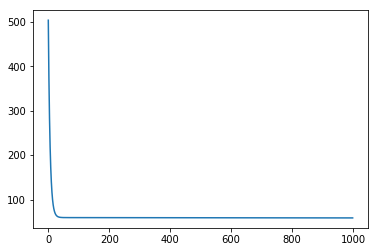

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

1. 任意两个节点之间的距离为正
2. 每次迭代对搜索历史列表进行排序

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

DFS不能保证可以找到最优解，但Iterative DFS可以。Iterative DFS每次搜索时，会按照DFS的方式对小于指定深度的节点进行遍历，从而保证搜索到的Destination是最优解。

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

需要保证找到最优解时，使用BFS；对空间复杂度有要求时，使用DFS。

##### 2.4 When can we use machine learning ?

需要通过从数据中，学习并不断改进一个模型，对未知数据进行预测时，可以使用机器学习。机器学习可以解决回归和分类任务。

##### 2.5 What is the gradient of a function ?

函数在一个点的梯度是指函数在该店增大速度最快的方向。

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

通过梯度提升的方法。从一个点出发，不断迭代往梯度增加的方向进行搜索。利用梯度只能找出函数的局部最大值。

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 

In [24]:
import pandas as pd
import numpy as np
import requests
import json
import re
import os
# 以下代码在notebook中运行得不到结果，在PyCharm中可以正常运行。所以在PyCharm中保存数据，再在notebook中进行读取。
# url = 'http://service.shmetro.com/skin/js/pca.js'
# headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36"}

# r = requests.get(url, headers=headers)
# with open('/home/kuan/Desktop/NLP/week2/sh_metro.html','w') as f:
#     f.write(r.text)

In [25]:
filename = '/home/kuan/Desktop/NLP/week2/sh_metro.html'
with open(filename) as f:
    content = ''.join(f.read().split('\n'))
    station_code = re.findall('var stations = {(.*)}var lines = ',content)
    lines = re.findall('var lines = {(.*?)}',content)

In [26]:
stations = {}
for s in station_code[0].split(','):
    ss = s.split(':')
    stations[ss[0].strip('"')] = ss[1].strip('"')

In [28]:
lines = lines[0]

In [29]:
line_names = re.findall('\"(\w+)\":',lines)

In [30]:
line_codes = re.findall('(\[.*?\])',lines)
codes = []
for code in line_codes:
    codes.append([s.strip('"') for s in re.findall('\[(.*)\]',code)[0].split(",")])

In [31]:
line_dict = {}
for i,name in enumerate(line_names):
    line_dict[name] = [stations[c] for c in codes[i]]

In [32]:
from collections import defaultdict
graph = defaultdict(list)
for line, stations_ in line_dict.items():
    for i, station in enumerate(stations_):
        if i == 0:
            graph[station].append(stations_[i+1])
        elif i == len(stations_)-1:
            graph[station].append(stations_[i-1])
        else:
            graph[station].append(stations_[i+1])
            graph[station].append(stations_[i-1])

In [33]:
def bsf(start,end,graph=graph):
    paths = [[start]]
    visited = set()
    
    while paths:
        path = paths.pop(0)
        last = path[-1]
        if last in visited:
            continue
        next_stations = graph[last]
        
        for station in next_stations:
            if station in path:
                continue
            new_path = path + [station]
            paths.append(new_path)
            
            if station == end:
                return new_path
        visited.add(last)

In [34]:
bsf('世纪公园','静安寺')

['世纪公园', '上海科技馆', '世纪大道', '东昌路', '陆家嘴', '南京东路', '人民广场', '南京西路', '静安寺']

In [35]:
import random
for i in range(5):
    s1 = random.choice(list(graph.keys()))
    s2 = random.choice(list(graph.keys()))
    if s1 != s2:
        print("From {} to {}:".format(s1,s2))
        print(bsf(s1,s2))
        print('\n')

From 芦恒路 to 江川路:
['芦恒路', '凌兆新村', '东方体育中心', '龙耀路', '云锦路', '龙华', '龙漕路', '漕宝路', '上海南站', '锦江乐园', '莲花路', '外环路', '莘庄', '春申路', '银都路', '颛桥', '北桥', '剑川路', '东川路', '金平路', '华宁路', '文井路', '闵行开发区', '江川路']


From 五洲大道 to 醉白池:
['五洲大道', '东靖路', '巨峰路', '东陆路', '复兴岛', '爱国路', '隆昌路', '宁国路', '江浦公园', '大连路', '提篮桥', '国际客运中心', '天潼路', '曲阜路', '汉中路', '南京西路', '陕西南路', '嘉善路', '肇嘉浜路', '徐家汇', '宜山路', '桂林路', '漕河泾开发区', '合川路', '星中路', '七宝', '中春路', '九亭', '泗泾', '佘山', '洞泾', '松江大学城', '松江新城', '松江体育中心', '醉白池']


From 杨树浦路 to 惠南东:
['杨树浦路', '浦东大道', '世纪大道', '上海科技馆', '世纪公园', '龙阳路', '华夏中路', '罗山路', '周浦东', '鹤沙航城', '航头东', '新场', '野生动物园', '惠南', '惠南东']


From 虹口足球场 to 创新中路:
['虹口足球场', '西藏北路', '中兴路', '曲阜路', '天潼路', '南京东路', '陆家嘴', '东昌路', '世纪大道', '上海科技馆', '世纪公园', '龙阳路', '张江高科', '金科路', '广兰路', '唐镇', '创新中路']


From 岚皋路 to 交通大学:
['岚皋路', '镇坪路', '曹杨路', '隆德路', '江苏路', '交通大学']


